<a href="https://colab.research.google.com/github/jaytrey777/Logistic-Random-Forest-or-KNN-/blob/main/Logistic_Random_Forest_or_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

Your task in this assignment will be to build the best model you can to diagnose cancer and report on your results.

1.  Logistic Regression

    - Start by creating and evaluating a default logistic regression model using appropriate metrics and a confusion matrix.

    - Then, use GridSearchCV to tune the penalty type and C values (inverse regularization strength) for the model to find the optimal combination of hyperparameter values, and evaluate the resulting tuned model.

- NOTE: Make sure to select an appropriate solver that would allow you to explore both L1 and L2 penalties. In order to choose the right solver, LogisticRegression documentation to see which solvers support which penalty types.

- When you create your parameter dictionary:

    - Your penalties should be ['l1', 'l2']

    - Your C values should be logarithmic: [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]

- Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.
- In a text cell, address these questions for your logistic regression models:

  - Which hyperparameters did you tune?
  - What values for those hyperparameters led to the best-tuned model?


2.  K-Nearest Neighbors

  - Start by creating and evaluating a default knn model using appropriate metrics and a confusion matrix

  - Then, use GridSearchCV to tune the model.

- Check the KNN documentation to choose hyperparameters to tune. 
- Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.
- In a text cell, address these questions for your KNN models:

  - Which hyperparameters did you tune?
  - What values for those hyperparameters led to the best-tuned model?


3. Random Forest

- Start by creating and evaluating a default random forest model using appropriate metrics and a confusion matrix

- The, use GridSearchCV to tune the model.

- Check the random forest documentation to choose hyperparameters to tune. 
- Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

- In a text cell, address these questions for your random forest models:

  - Which hyperparameters did you tune?
  - What values for those hyperparameters led to the best-tuned model?


4. Answer these questions in a text cell at the end of your notebook:

- What do 'false positives' and 'false negatives' mean for this problem? 
- Which is worse?
- Which of your models would you recommend for production? 
- Which metric or metrics did you use to decide that, and why?


# Imports & Drive Mounting

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

from sklearn import set_config
set_config(display = 'diagram')

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [119]:
filename = '/content/drive/MyDrive/Colab Notebooks/02. Weeks 5-8: Machine Learning/07 Week 7: Classification/5. Core Assignments/WisconsinBreastCancer.csv'
df = pd.read_csv(filename)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Preprocessing

In [121]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

To set up the data for the classification models, I will do the following:

- Delete the id column because there is a unique id for every person and that column will not help the model in any way.
- Since diagnosis is the target variable and the results are either benign (noncancerous) or malignant (cancerous), I am going to change the outcomes to the following:
0 = benign
1 = malignant.

In [122]:
df['diagnosis'].replace({'B':0, 'M':1}, inplace = True) # replaces the values in the target variable

In [123]:
X = df.drop(columns = (['id','diagnosis'])).copy()
y = df['diagnosis']

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [125]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Train-Test Split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.11090
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.53,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075
210,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.24,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865


All of the columns are numerical with no missing data.

# 1) Logistic Regression

## Default Model

In [127]:
log_reg = LogisticRegression(C = 1000)
log_reg_scaler = StandardScaler()
log_reg_pipeline = make_pipeline(log_reg_scaler, log_reg)
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [128]:
log_reg_train_predictions = log_reg_pipeline.predict(X_train)
log_reg_test_predictions = log_reg_pipeline.predict(X_test)

### Graph

In [129]:
# This code is to plot/visualize the predictions
log_reg_df = pd.DataFrame(data = {'Worst Fractal Dimension': X_test['fractal_dimension_worst'],
                     'diagnosis': y_test})
log_reg_df['log_reg_preds'] = pd.DataFrame(log_reg_pipeline.predict_proba(X_test)).loc[:, 1].values
log_reg_df = log_reg_df.sort_values(['log_reg_preds'])


Text(0.5, 0, 'Worst Fractal Dimension')

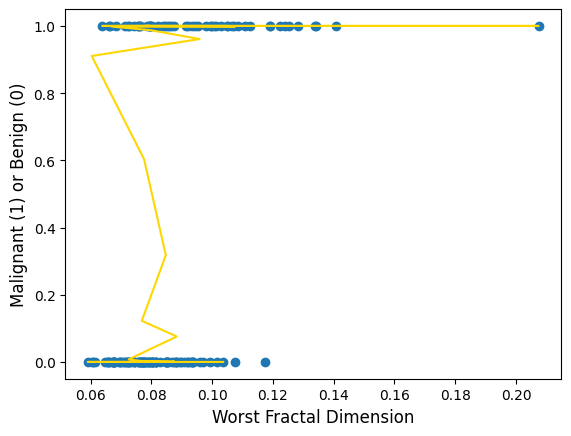

In [130]:
plt.scatter(X_test['fractal_dimension_worst'], y_test)
plt.plot(log_reg_df['Worst Fractal Dimension'], log_reg_df['log_reg_preds'].values, color='gold')
plt.ylabel('Malignant (1) or Benign (0)', fontsize = 12)
plt.xlabel('Worst Fractal Dimension', fontsize = 12)

### Classification Report

In [131]:
#Metrics
print('Logistic Regression Training Data Metrics:\n', classification_report(y_train, log_reg_train_predictions))
print('')
print('Logistic Regression Testing Data Metrics:\n', classification_report(y_test, log_reg_test_predictions))

Logistic Regression Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Logistic Regression Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        89
           1       0.87      0.98      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



### Confusion Matrix

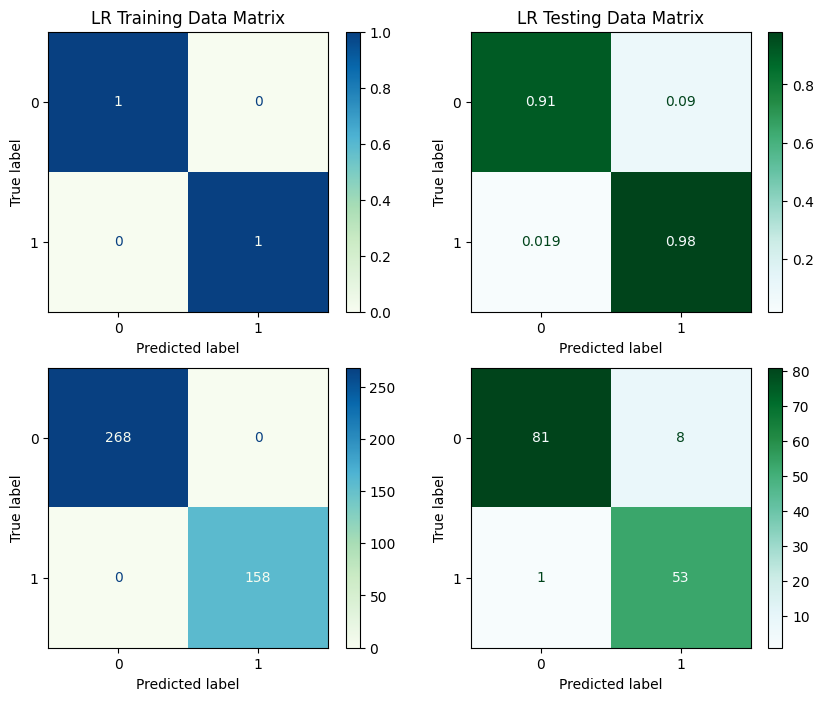

In [132]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('LR Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')
axes[0][1].set_title('LR Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

## Tuned Model

In [133]:
log_reg.get_params()

{'C': 1000,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [134]:
#create our parameter dictionary
#log_reg = LogisticRegression() ***RAN PREVIOUSLY***
parameters_dict = {'penalty': ['l1', 'l2'],
                  'C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]}


In [135]:
lr_grid_search = GridSearchCV(log_reg, parameters_dict)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(C=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']})

In [136]:
lr_grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [137]:
log_reg2 = LogisticRegression(C = 10, penalty = 'l2')
log_reg_scaler2 = StandardScaler()
log_reg_pipeline2 = make_pipeline(log_reg_scaler2, log_reg2)
log_reg_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=10))])

In [138]:
log_reg_train_predictions2 = log_reg_pipeline2.predict(X_train)
log_reg_test_predictions2 = log_reg_pipeline2.predict(X_test)

### Classification Report

In [139]:
#Metrics
print('Tuned Logistic Regression Training Data Metrics:\n', classification_report(y_train, log_reg_train_predictions2))
print('')
print('Tuned Logistic Regression Testing Data Metrics:\n', classification_report(y_test, log_reg_test_predictions2))

Tuned Logistic Regression Training Data Metrics:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       268
           1       0.99      0.98      0.99       158

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426


Tuned Logistic Regression Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.95      0.98      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### Confusion Matrix

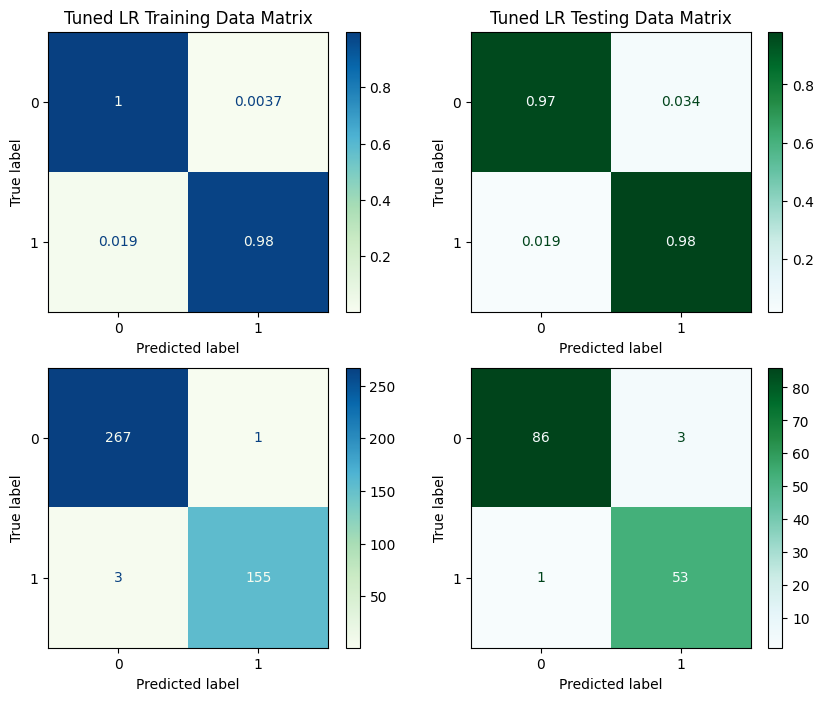

In [140]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions2,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('Tuned LR Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions2,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('Tuned LR Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions2,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions2,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

## Model Analysis

- I was able to successfully tune the `penalty` and `C` hyperamaters to optimize the `Logical Regression` Model.
- The model performs the best with a `penalty value of 12` and a `C value of 10`.
- The accruacy increased `3%` from `94%` to `97%` by tuning the parameters.

# 2) K-Nearest Neighbors Classifier

## Default Model

In [148]:
knn = KNeighborsClassifier()
knn_scaler = StandardScaler()

In [149]:
knn_pipeline = make_pipeline(knn_scaler, knn)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [151]:
knn_train_predictions = knn_pipeline.predict(X_train)
knn_test_predictions = knn_pipeline.predict(X_test)

### Classification Report

In [152]:
#Metrics
print('KNN Training Data Metrics:\n', classification_report(y_train, knn_train_predictions))
print('')
print('KNN Testing Data Metrics:\n', classification_report(y_test, knn_test_predictions))

KNN Training Data Metrics:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       268
           1       1.00      0.94      0.97       158

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426


KNN Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Confusion Matrix

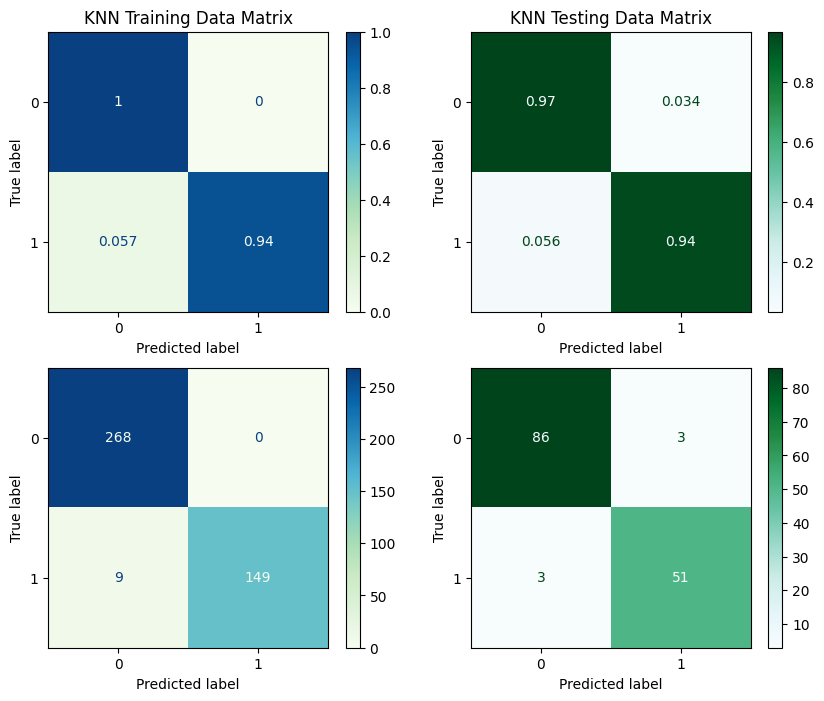

In [153]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('KNN Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('KNN Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

## Tuned Model

In [154]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [155]:
knn_parameters_dict = {'leaf_size' : list(range(1,50)),
                      'n_neighbors': list(range(1,20)),
                      'weights': ['uniform', 'distance']}

In [115]:
knn_grid_search = GridSearchCV(knn, knn_parameters_dict)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [156]:
knn_grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}

In [160]:
knn2 = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3, weights = 'distance')
knn_scaler2 = StandardScaler()
knn_pipeline2 = make_pipeline(knn_scaler2, knn2)
knn_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=3,
                                      weights='distance'))])

In [162]:
knn_train_predictions2 = knn_pipeline2.predict(X_train)
knn_test_predictions2 = knn_pipeline2.predict(X_test)

### Classificaton Report

In [163]:
#Metrics
print('Tuned KNN Training Data Metrics:\n', classification_report(y_train, knn_train_predictions2))
print('')
print('Tuned KNN Testing Data Metrics:\n', classification_report(y_test, knn_test_predictions2))

Tuned KNN Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Tuned KNN Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Confusion Matrix

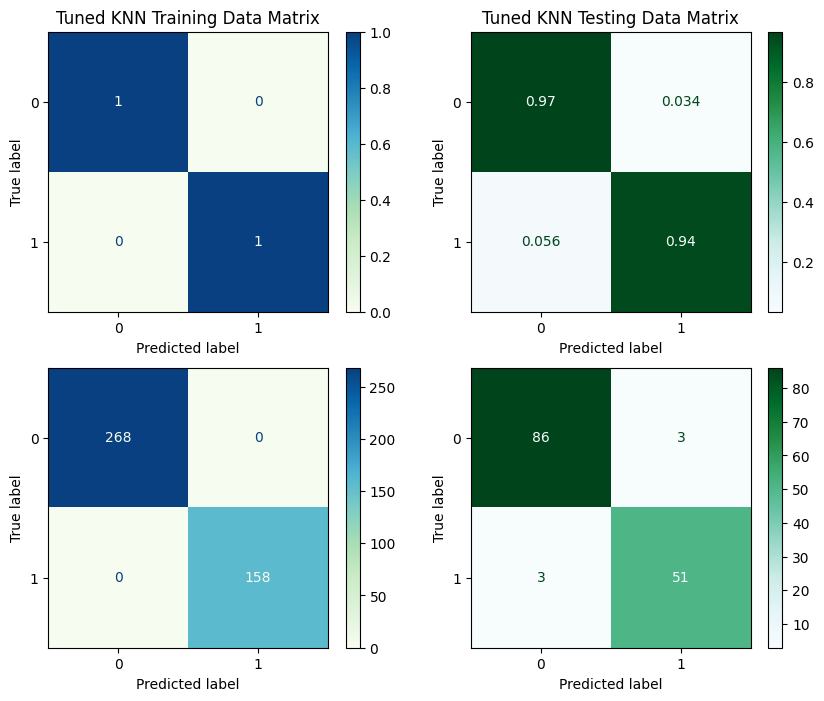

In [176]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions2,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('Tuned KNN Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions2,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('Tuned KNN Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions2,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions2,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

## Analysis 

- I was able to successfully tune the `leaf_size`, `weights` and `n_neighbors` hyperamaters to optimize the `K-Nearest Neighbors` Model.
- The model performs the best with a `leaf_size of 1`, a `weight` set to `distance` and a `n_neighbor of 3 value of 10`.
- Even with the `optimized parameters`, the `accuracy` did not change.

# 3) Random Forest Classifier

## Default Model

Start by creating and evaluating a default random forest model using appropriate metrics and a confusion matrix

The, use GridSearchCV to tune the model.

Check the random forest documentation to choose hyperparameters to tune.

Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

In a text cell, address these questions for your random forest models:

Which hyperparameters did you tune?
What values for those hyperparameters led to the best-tuned model?

In [173]:
rf = RandomForestClassifier()
rf_scaler = StandardScaler()
rf_pipeline = make_pipeline(rf_scaler, rf)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [174]:
rf_train_predictions = rf_pipeline.predict(X_train)
rf_test_predictions = rf_pipeline.predict(X_test)

### Classification Report

In [175]:
#Metrics
print('RF Training Data Metrics:\n', classification_report(y_train, rf_train_predictions))
print('')
print('RF Testing Data Metrics:\n', classification_report(y_test, rf_test_predictions))

RF Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


RF Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### Confusion Matrix

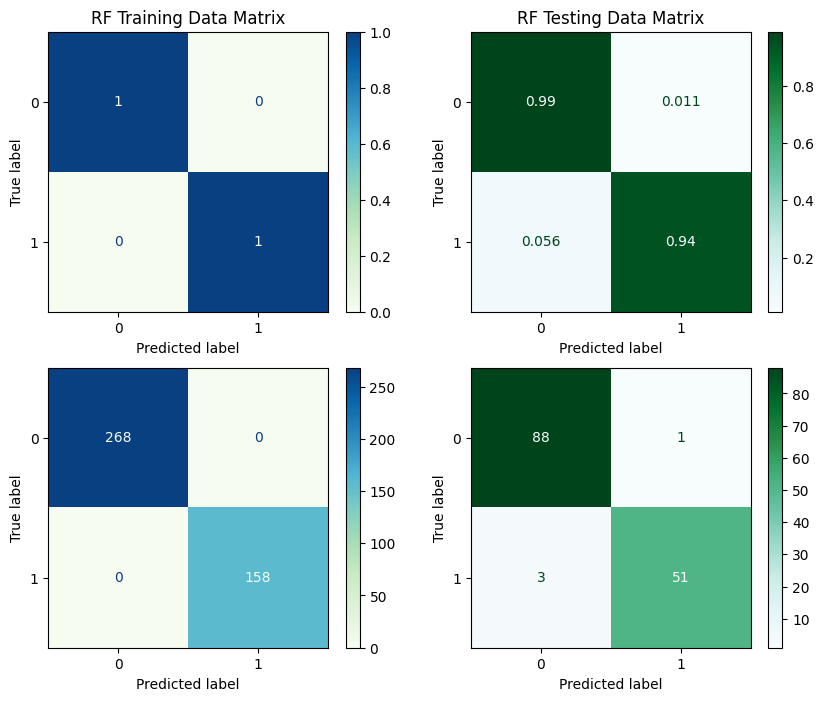

In [177]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('RF Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('RF Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

## Tuned Model

In [178]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [191]:
rf_parameters_dict = {'max_depth' : list(range(1, 100, 10)),
                      'n_estimators': list(range(1, 300, 50)),
                      'max_features': ['sqrt', 'log2', None]}

In [185]:
rf_grid_search = GridSearchCV(rf, rf_parameters_dict)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [1, 51, 101, 151, 201, 251]})

In [186]:
rf_grid_search.best_params_

{'max_depth': 91, 'max_features': 'sqrt', 'n_estimators': 151}

In [187]:
rf2 = RandomForestClassifier(max_depth = 91, n_estimators = 151, max_features = 'sqrt')
rf_scaler2 = StandardScaler()
rf_pipeline2 = make_pipeline(rf_scaler2, rf2)
rf_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=91, n_estimators=151))])

In [188]:
rf_train_predictions2 = rf_pipeline2.predict(X_train)
rf_test_predictions2 = rf_pipeline2.predict(X_test)

### Classification Report

In [189]:
#Metrics
print('RF Training Data Metrics:\n', classification_report(y_train, rf_train_predictions2))
print('')
print('RF Testing Data Metrics:\n', classification_report(y_test, rf_test_predictions2))

RF Training Data Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


RF Testing Data Metrics:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



### Confusion Matrix

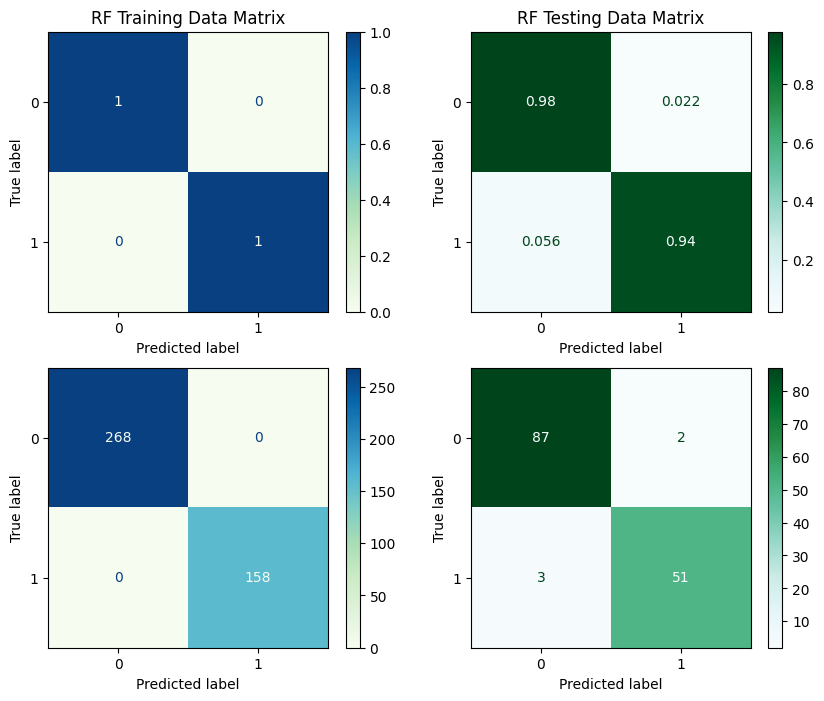

In [190]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions2,
                                        ax=axes[0][0], cmap='GnBu',
                                        normalize='true')
axes[0][0].set_title('RF Training Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions2,
                                        ax=axes[0][1], cmap='BuGn',
                                        normalize='true')

axes[0][1].set_title('RF Testing Data Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, rf_train_predictions2,
                                        ax=axes[1][0], cmap='GnBu',
                                        normalize=None)

ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predictions2,
                                        ax=axes[1][1], cmap='BuGn',
                                        normalize=None)

## Model Analysis

- I was able to successfully tune the `max_depth`, `max_features` and `n_estimators` hyperamaters to optimize the `Random Forest` Model.
- The model performs the best with a `max_depth of 91`, the `max_features` set to `'sqrt'` set to `distance` and a `n_estimators of 151`.
- Even with the `optimized parameters`, the `accuracy` did not change. and remained at 97%

# 4) Overall Analysis


- With this data set, a `false positive` would mean that wou `tested positive` for cancer but you don't actually have it. Conversely, a `false negative` would mean you `tested negative` for cancer and you actually have it. 

- `False positives` would be bad financally because the cost of cancer treatments is expensive. However, `false negatives` would mean that you have cancer and your life could be at risk.  I think life is more valuable than money so a `false negative is worse`, but they are both pretty bad. 

- I think the `tuned logistic regression` model performed the best for this dat set because the `accuracy is equal at 97%` across all the tuned models, but the fact there is only `1 false negative` means that in the real world this model would be `less likely` to cost someone their life with an incorrect prediction. 